<a href="https://colab.research.google.com/github/RM-RAMASAMY/Data_preparation_eda_visualizatoin/blob/main/AutoViML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install kaggle

# Upload your kaggle.json file (API key)
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d positivealexey/youtube-channel-performance-analytics

# Unzip the downloaded dataset
!unzip youtube-channel-performance-analytics.zip

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/positivealexey/youtube-channel-performance-analytics
License(s): CC-BY-NC-SA-4.0
youtube-channel-performance-analytics.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  youtube-channel-performance-analytics.zip
replace youtube_channel_real_performance_analytics.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: youtube_channel_real_performance_analytics.csv  




---

<br>

# About the data:
# YouTube Video Analytics Dataset Overview

This dataset provides an in-depth look at YouTube video analytics, capturing key metrics related to video performance, audience engagement, revenue generation, and viewer behavior. Sourced from real video data, it highlights how variables like video duration, upload time, and ad impressions contribute to monetization and audience retention. This dataset is ideal for data analysts, content creators, and marketers aiming to uncover trends in viewer engagement, optimize content strategies, and maximize ad revenue. Inspired by the evolving landscape of digital content, it serves as a resource for understanding the impact of YouTube metrics on channel growth and content reach.

## Video Details
* Video Duration
* Video Publish Time
* Days Since Publish
* Day of Week

## Revenue Metrics
* Revenue per 1000 Views (USD)
* Estimated Revenue (USD)
* Ad Impressions
* Various ad revenue sources (e.g., AdSense, DoubleClick)

## Engagement Metrics
* Views
* Likes
* Dislikes
* Shares
* Comments
* Average View Duration
* Average View Percentage (%)
* Video Thumbnail CTR (%)

## Audience Data
* New Subscribers
* Unsubscribes
* Unique Viewers
* Returning Viewers
* New Viewers

## Monetization & Transaction Metrics
* Monetized Playbacks
* Playback-Based CPM
* YouTube Premium Revenue
* Orders
* Total Sales Volume (USD)

The main dataset file containing 70 columns of video analytics metrics. Each row represents a single YouTube video, with variables detailing video duration, publication timing, engagement stats (likes, shares, comments), revenue metrics (AdSense, CPM, Premium revenue), viewer demographics, and ad performance. This file serves as the primary source for analysis.

link to the data set: https://www.kaggle.com/datasets/positivealexey/youtube-channel-performance-analytics/data

In [1]:
import pandas as pd
df = pd.read_csv('/content/youtube_channel_real_performance_analytics.csv')
display(df.head())

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


## Introduction to autoviml Kernel: Quick Start!
This is a Kagggle Kernel meant to demonstrate the use of a new Python3 library called "autoviml".

Autoviml stands for "Automatic Variant Interpretable ML".




---
<br>

# Data preprocessing:

In [2]:
# Display basic information about the DataFrame
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [3]:
# Handle missing values
# Identify columns with missing values
cols_with_missing = df.columns[df.isna().any()].tolist()
print(f"Columns with missing values: {cols_with_missing}")

Columns with missing values: []


In [4]:
!pip install -U scikit-learn >/dev/null
from sklearn.impute import SimpleImputer

# Impute numerical missing values with median
for col in cols_with_missing:
    if pd.api.types.is_numeric_dtype(df[col]):
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])
    elif pd.api.types.is_object_dtype(df[col]):
        # Impute categorical missing values with the mode
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]])

In [5]:
import numpy as np
# Outlier handling
# Identify numerical features
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

In [6]:
# Winsorizing outliers
for col in numerical_cols:
    df[col] = np.clip(df[col], np.percentile(df[col], 1), np.percentile(df[col], 99))  # Winsorize at 1st and 99th percentiles

In [7]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [8]:
# Feature scaling
# Normalize numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the cleaned and preprocessed DataFrame:

In [9]:
print(df.describe(include='all'))

               ID  Video Duration  Video Publish Time  Days Since Publish  \
count  364.000000      364.000000          364.000000          364.000000   
mean     0.500000        0.332576          176.659341            0.232870   
std      0.295559        0.163973          103.374093            0.234058   
min      0.000000        0.000000            0.000000            0.000000   
25%      0.244898        0.247487           86.750000            0.090307   
50%      0.500000        0.307561          175.500000            0.150512   
75%      0.755102        0.396646          266.250000            0.270921   
max      1.000000        1.000000          356.000000            1.000000   

              Day       Month        Year  Day of Week  \
count  364.000000  364.000000  364.000000   364.000000   
mean     0.493590    0.512987    0.342033     3.063187   
std      0.297467    0.311047    0.316329     2.036544   
min      0.000000    0.000000    0.000000     0.000000   
25%      0.23333

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Assuming 'df' is your DataFrame (as defined in the previous code)

# Check for missing values again after imputation
missing_values = df.isnull().sum()
print("Missing Values after imputation:\n", missing_values)

# Check for infinite values
infinite_values = np.isinf(df).sum()
print("\nInfinite Values:\n", infinite_values)


# Check for other unacceptable values (you can customize this part)
# Example: check for values outside a specific range
# ... (add your checks here) ...

# Summary
print("\nSummary of Data Quality:")
print(f"- Total Missing Values: {missing_values.sum()}")
print(f"- Total Infinite Values: {infinite_values.sum()}")

# ... (Add summary of your other checks) ...

Missing Values after imputation:
 ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

Infinite Values:
 ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

Summary of Data Quality:
- Total Missing Values: 0
- Total Infinite Values: 0


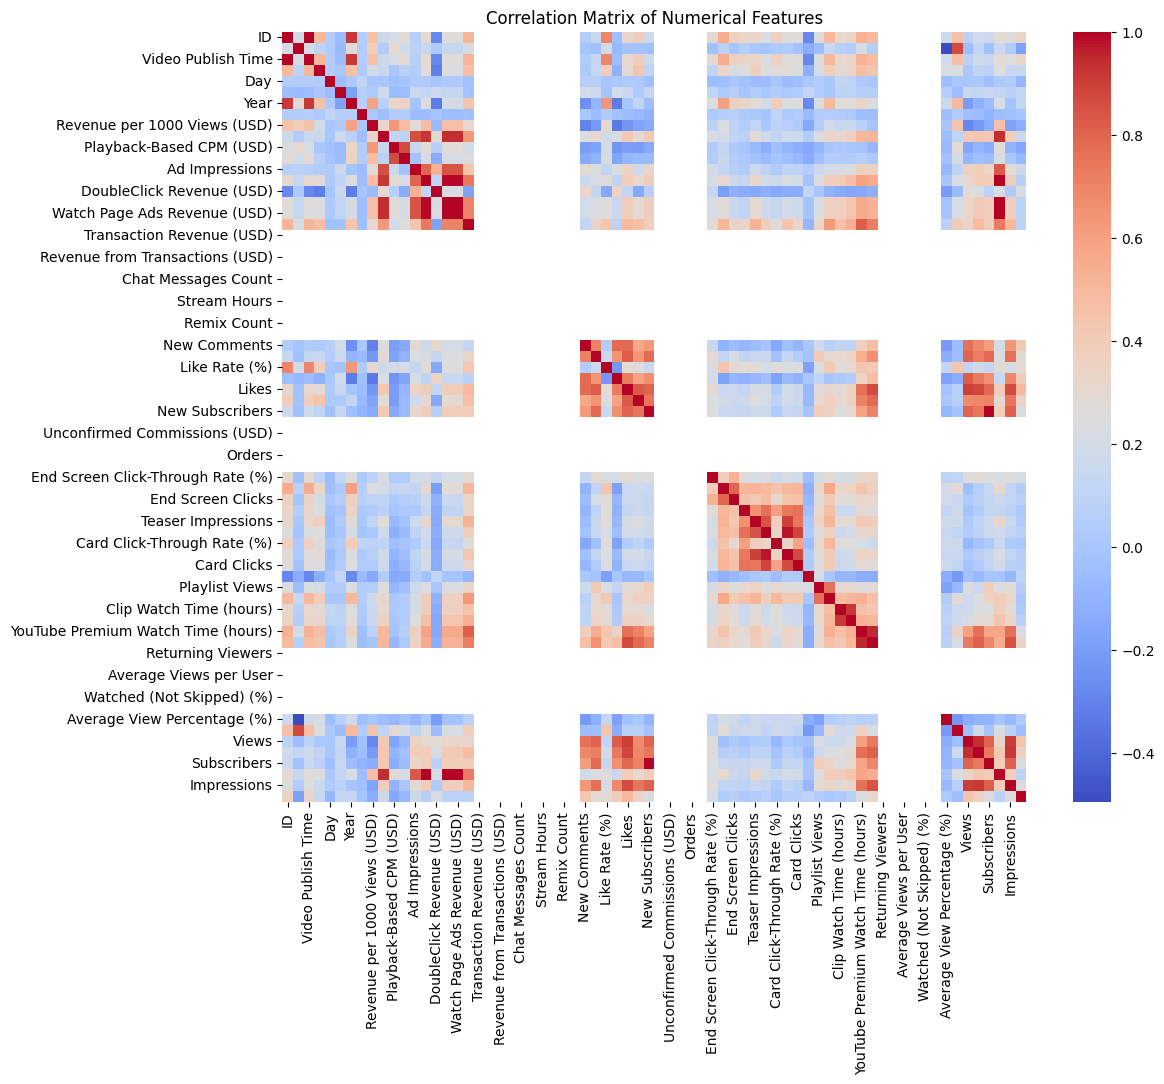

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Assuming df is already loaded and preprocessed as in the provided code

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Pairplot for selected features (adjust as needed)
selected_features = ['Views', 'Likes', 'Dislikes', 'Estimated Revenue (USD)']  # Example
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Distribution plots for key features
for col in ['Views', 'Estimated Revenue (USD)', 'Average View Duration']:  # Example
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

# Boxplot for potential outliers after handling (check for any remaining)
for col in ['Views', 'Estimated Revenue (USD)']: # Example
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

# Scatter plot (example: Views vs. Estimated Revenue)
plt.figure(figsize=(10, 6))
plt.scatter(df['Views'], df['Estimated Revenue (USD)'], alpha=0.5)
plt.title('Views vs. Estimated Revenue')
plt.xlabel('Views')
plt.ylabel('Estimated Revenue (USD)')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target variable (y)
X = df.drop('Estimated Revenue (USD)', axis=1)  # Assuming 'Estimated Revenue (USD)' is your target
y = df['Estimated Revenue (USD)']

# Initialize and train a RandomForestRegressor (you can use other models)
model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis() # Invert y-axis to display the most important features at the top
plt.show()

In [14]:
!pip install --upgrade ipykernel==6.0.0
!pip install autoviml pandas==2.2.2 scikit-learn>=1.3.1 >/dev/null

  Using cached ipykernel-6.0.0-py3-none-any.whl.metadata (2.0 kB)
Requested ipykernel==6.0.0 from https://files.pythonhosted.org/packages/df/4c/7df6ac3670a22dca8106fdd2e1d85d226dd5862da20ab8146e3d5e3a0186/ipykernel-6.0.0-py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    matplotlib-inline (<0.2.0appnope,>=0.1.0) ; platform_system == "Darwin"
                      ~~~~~~~~^
Please use pip<24.1 if you need to use this version.
ERROR: Ignored the following yanked versions: 6.18.0, 6.18.1, 6.18.2, 6.18.3, 6.19.0, 6.20.0, 6.21.0, 6.27.0
ERROR: Could not find a version that satisfies the requirement ipykernel==6.0.0 (from versions: 4.0.1, 4.0.2, 4.0.3, 4.1.0, 4.1.1, 4.2.0, 4.2.1, 4.2.2, 4.3.0, 4.3.1, 4.4.0, 4.4.1, 4.5.0, 4.5.1, 4.5.2, 4.6.0, 4.6.1, 4.7.0, 4.8.0, 4.8.1, 4.8.2, 4.9.0, 4.10.0, 4.10.1, 5.0.0b1, 5.0.0, 5.1.0, 5.1.1, 5.1.2, 5.1.3, 5.1.4, 5.2.0, 5.2.1, 5.3.0, 5.3.1, 5.3.2, 5.3.3, 5.3.4, 5.4.0, 5.4.1, 5.4.2, 5

In [15]:
!apt-get update  # Update package lists
!apt-get install -y python3-venv  # Install python3-venv

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [16]:
!pip install ipykernel==5.5.6  # Try installing ipykernel 6.0.0 again

  Using cached ipykernel-5.5.6-py3-none-any.whl.metadata (1.1 kB)
Using cached ipykernel-5.5.6-py3-none-any.whl (121 kB)
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.29.5
    Uninstalling ipykernel-6.29.5:
      Successfully uninstalled ipykernel-6.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.3.1 requires ipykernel>=6.5.0, but you have ipykernel 5.5.6 which is incompatible.


In [30]:
!python3 -m venv myenv
!source myenv/bin/activate
!pip install pandas==2.2.2 scikit-learn>=1.3.1

In [31]:
!pip install autoviml

  Using cached ipykernel-6.29.5-py3-none-any.whl.metadata (6.3 kB)
Using cached ipykernel-6.29.5-py3-none-any.whl (117 kB)
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [12]:
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [14]:
!pip install scikit-learn==1.0.2
!pip install --upgrade imbalanced-ensemble
!pip install --upgrade autoviml
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
imbalanced-ensemble 0.2.0 requires scikit-learn>=1.2.0, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


  Using cached imbalanced_ensemble-0.2.2-py2.py3-none-any.whl.metadata (41 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.6 MB/s eta 0:00:00
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.6/744.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 59.8 MB/s eta 0:00:00
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: imbalanced-ensemble
    Found existing installation: imbalanced-ensemble 0.2.0
    Uninstalling imbalanced-ensemble-0.

  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autoviml 0.1.800 requires scikit-learn<=1.2.2,>=0.24, but you have scikit-learn 1.5.2 which is incompatible.


In [13]:
from numpy import interp
from autoviml.Auto_ViML import Auto_ViML

ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py)

In [19]:
# prompt: use Autoviml and perform prediction of  'Estimated Revenue (USD)'

# Define features (X) and target variable (y)
X = df.drop('Estimated Revenue (USD)', axis=1)
y = df['Estimated Revenue (USD)']

# Use Auto_ViML to train a model
model, features, trainm = Auto_ViML(X, y,
                                    scoring_parameter='neg_mean_absolute_error',
                                    hyper_param='GS',
                                    feature_reduction=True,
                                    ml_task='regression',
                                    top_n_features=10) # You can adjust top_n_features

NameError: name 'Auto_ViML' is not defined